# Misure Poissoniane

La distribuzione di densit\`a di probabilit\`a (pdf) esponenziale \`e profondamente legata a quella Poissoniana e viene utilizzata, ad esempio, per descrivere gli inter-tempi di decadimento di processi con un tasso di decadimento costante (spesso detto \textit{rate} $\rho$, che \`e il numero di eventi medio atteso nell'unit\`a di tempo) osservati in una data finestra di tempo $\Delta{}t$.

In [1]:
import Library as lib
import numpy as np
import matplotlib.pyplot as plt
import math

# Esercizio 1
Si definisca in una libreria la funzione densità di probabilità di Poisson con parametro $\lambda$ e se ne tracci il grafico per valori interi del parametro da 0 a 10.

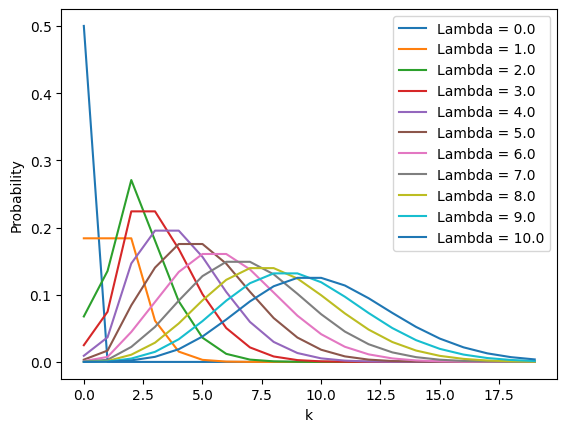

In [2]:
Lambdas_for_Plot = np.arange(0,11).astype(float)
k_for_plot = np.arange (0,20)

fig,ax = plt.subplots ()

for l in Lambdas_for_Plot:
  probvalues = [lib.Poisson (k,l) for k in k_for_plot]
  ax.plot (k_for_plot,probvalues, label = f"Lambda = {l}")

ax.set (xlabel = "k",
        ylabel = "Probability")
ax.legend ()

# Esercizio 2

Si scriva, in una libreria, una funzione per generare 1000 eventi distribuiti esponenzialmente data una costante esponenziale fissata $\lambda = 10$ e si disegni l'istogramma dei valori ottenuti scegliendo gli estremi ed il numero di bin dell'istogramma con un algoritmo adeguato; si sovrapponga all'istogramma la corrispondente forma funzionale della pdf.

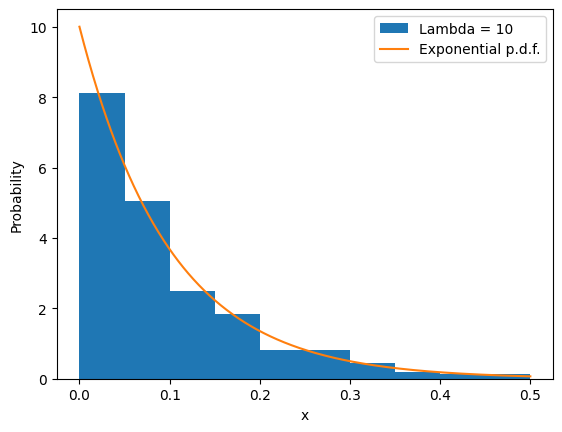

In [3]:
NumbersToGenerate = 1000
ExponentialCostant = 10

Numbers = lib.GenExp (ExponentialCostant, NumbersToGenerate)
binedges = np.linspace (0, 5./ExponentialCostant, lib.sturges (NumbersToGenerate))

ExpPDF = lib.ExpDistribution(binedges,ExponentialCostant)

fig,ax = plt.subplots()
ax.hist (Numbers, bins=binedges, label=f"Lambda = {ExponentialCostant}", density=True)

x_coord = np.linspace(0, 5./ExponentialCostant, 1000)

ax.plot (x_coord, lib.ExpDistribution (x_coord,ExponentialCostant), label= f"Exponential p.d.f.")
ax.set (xlabel = "x",
        ylabel = "Probability")
ax.legend ()

# Esercizio 3

Sapendo che $\lambda = \rho \times \Delta{}t$, si fissi $\rho$ = 2~Hz e $\Delta{}t$ = 0.5~s e si costruisca l'istogramma del numero di eventi osservati in 2000 \texit{toy experiment}$.
Si disegni il risultato ottenuto in un istogramma e lo si sovrapponga alla distribuzione di Poisson corrispondente, scritta analiticamente (implementandola nella libreria sviluppata al punto precedente).

[Text(0.5, 0, 'Eventi per finestra'), Text(0, 0.5, 'Probabilità')]

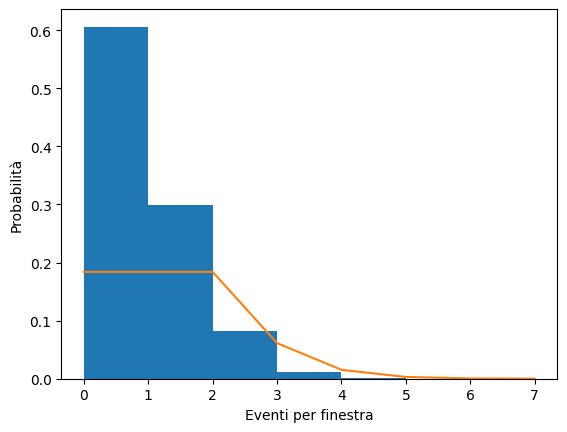

In [4]:
Rate = 2 #eventi/s = Hz
Finestra = 0.5 #s

# la distribuzione temporale degli inter-tempi fra gli eventi è esponenziale
NumeroDiFinestre = 2000
t0=0
Counts = []
for finestra_i in range(NumeroDiFinestre):
  #controllo quanti intervalli ci sono 
  t = t0+lib.GenExp(Rate*Finestra,1)
  count = 0
  while t<Finestra:
    count = count+1
    t=t+lib.GenExp(Rate*Finestra,1)
  Counts.append(count)

binedges = np.arange (0, int (np.ceil (Rate * Finestra * 8)))

fig,ax = plt.subplots()
ax.hist(Counts,binedges,density=True,label = "Toy experiment")

#calcolo la poisson
PoissonValues = np.array([lib.Poisson(k,Rate*Finestra) for k in binedges])
ax.plot(binedges,PoissonValues,label = f"Poisson p.d.f.\nLambda = Rate*Finestra = {Rate*Finestra}")

ax.set(xlabel = "Eventi per finestra",
       ylabel = "Probabilità")
#ax.legend()

# Esercizio 4

Si scriva, sempre nella libreria sviluppata, la funzione che implementa il logaritmo della verosimiglianza (chiamata \verb!log_likelighood!) associata alla distribuzione degli eventi, utilizzando la pdf di Poisson come modello atteso e se ne faccia il disegno al variare del parametro $\lambda$ della Poissoniana. 

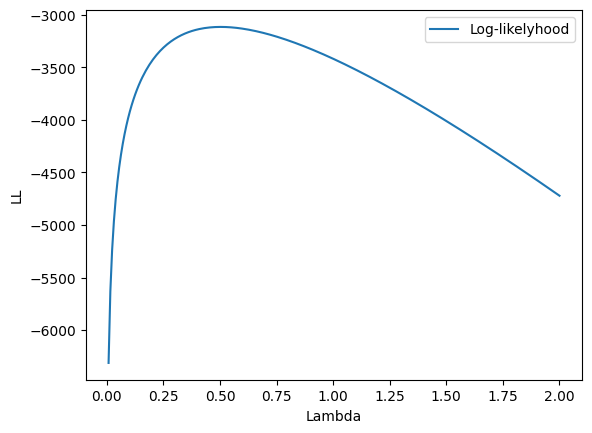

In [7]:
lambdas = np.linspace (0,2,256)
LL_values = [lib.LogLikelihoodPoisson (T, Counts) for T in lambdas]

fig,ax = plt.subplots ()
ax.plot (lambdas, LL_values, label = "Log-likelyhood")

ax.set(xlabel = "Lambda",
       ylabel = "LL",)
ax.legend ()

plt.show ()

# Esercizio 5

Si determini il valore di $\lambda$ per cui \verb!log_likelighood! \`e massima utilizzando il metodo della sezione aurea e si determini l'incertezza associata a questo stimatore con il metodo grafico e se ne stampi il risultato a schermo.

Migliore stima di lambda: 0.493
Intervallo di confidenza associato: (0.478, 0.509)


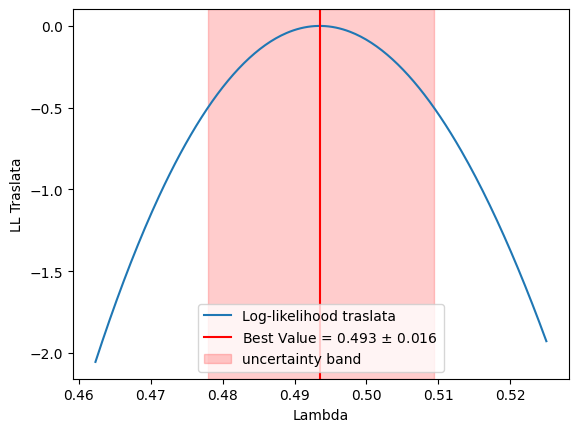

In [23]:
Counts = lib.GetEventToy (NumeroDiFinestre, Rate, Finestra)

#miglior stima
func = lambda x : lib.LogLikelihoodPoisson (x, Counts)
lambdaHat = lib.sezioneAureaMax (func, 0, 100)
# incertezza
llmax = lib.LogLikelihoodPoisson (lambdaHat, Counts)

Left  = lib.bisezione (lambda x: lib.LogLikelihoodPoisson (x, Counts) - llmax + 0.5, # funzione 
                       0, lambdaHat)                                                 # range
Right = lib.bisezione (lambda x: lib.LogLikelihoodPoisson (x, Counts) - llmax + 0.5, # funzione 
                       lambdaHat, 100.)                                              # range

print (f'Migliore stima di lambda: {lambdaHat:.3f}')
print (f'Intervallo di confidenza associato: ({Left:.3f}, {Right:.3f})')

delta = Right - Left
lambdas = np.linspace (Left - 0.5 * delta, Right + 0.5 * delta, 256)
LL_values = [lib.LogLikelihoodPoisson (T, Counts) - llmax for T in lambdas]

fig,ax = plt.subplots ()
ax.plot (lambdas, LL_values, label = "Log-likelihood traslata")
ax.axvline (lambdaHat, color = "r", label=f"Best Value = {lambdaHat:.3f} $\pm$ {(Right-Left)/2:.3f}") # posizione dello stimatore
ax.axvspan (Left, Right, color = "r", alpha = 0.2, label = 'uncertainty band') # banda di incertezza

ax.set(xlabel = "Lambda",
       ylabel = "LL Traslata",)
         # ylim = [-1,0],
         # xlim = [Left * 0.8, Right * 1.2])
ax.legend ()

plt.show ()